In [3]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## NEURALNETWORKSANDDEEPLEARNING/1 MODELPERFORMANCEANDFIT/NEURALNETWORKSANDDEEPLEARNING MODELPERFORMANCEANDFIT 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [4]:
#=================================================-
#### Slide 12: Loading packages  ####

# Helper packages.
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math
import seaborn as sns

# Scikit-learn packages.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# TensorFlow and supporting packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense





In [20]:
tf.__version__

'2.15.0'

In [5]:
#=================================================-
#### Slide 13: Directory settings  ####

from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




/Users/elliotstern/Library/CloudStorage/OneDrive-Personal/Data Society/intro neural nets
/Users/elliotstern/Library/CloudStorage/OneDrive-Personal/Data Society/intro neural nets/data


In [6]:
#=================================================-
#### Slide 14: Load the data  ####

credit_card = pd.read_csv(str(data_dir) + "/credit_card_data.csv")
print(credit_card.head())




   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
0         0         0   

In [10]:
#=================================================-
#### Slide 17: Data prep: convenience function (cont'd)  ####

def data_prep(df):
    
    # Fill missing values with mean 
    df = df.fillna(df.mean()['BILL_AMT1'])

    # Drop an unnecessary identifier column.
    df = df.drop('ID',axis = 1)

    # Convert 'sex' into dummy variables.
    sex = pd.get_dummies(df['SEX'], prefix = 'sex', drop_first = True)
    # Convert 'education' into dummy variables.
    education = pd.get_dummies(df['EDUCATION'], prefix = 'education', drop_first = True)
    # Convert 'marriage' into dummy variables.
    marriage = pd.get_dummies(df['MARRIAGE'], prefix = 'marriage', drop_first = True)

    # Drop `sex`, `education`, `marriage` from the data.
    df.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1, inplace = True)

    # Concatenate `sex`, `education`, `marriage` dummies to our dataset.
    df = pd.concat([df, sex, education, marriage], axis=1)
    
    # Separate predictors from data.
    X = df.drop(['default_payment_next_month'], axis=1)

    # Separate target from data.
    y = df['default_payment_next_month']

    # Set the seed to 1.
    np.random.seed(1)
    
    # Split data into train, test, and validation set, use a 70 - 15 - 15 split.
    # First split data into train-test with 70% for train and 30% for test.
    X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                        y,
                                                        test_size = .3,
                                                        random_state = 1)
    
    # Then split the test data into two halves: test and validation. 
    X_test, X_val, y_test, y_val = train_test_split(X_test,
                                                    y_test,
                                                    test_size = .5,
                                                    random_state = 1)
                                                    
    print("Train shape:", X_train.shape, "Test shape:", X_test.shape, "Val shape:", X_val.shape)
    
    # Transforms features by scaling each feature to a given range.
    # The default is the range between 0 and 1.
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    X_val_scaled = min_max_scaler.transform(X_val)
    
    return X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val




In [11]:
#=================================================-
#### Slide 18: Data prep  ####

X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val = data_prep(credit_card)




Train shape: (21000, 30) Test shape: (4500, 30) Val shape: (4500, 30)


In [ ]:
#=================================================-
#### Slide 19: Define and compile a sequential model  ####

def create_model(lr = .01):
  # Let's set the seed so that we can reproduce the results.
  tf.random.set_seed(1)
  opt = Adam(learning_rate = lr) # <- set optimizer

  model = Sequential([
          Dense(32, activation='relu', input_dim=30),#<- set input and 1st hidden layer
          Dense(32, activation='relu'),              #<- set 2nd hidden layer
          Dense(1, activation='sigmoid')             #<- set output layer

  ])

  model.compile(optimizer = opt,            #<- set optimizer
                loss='binary_crossentropy', #<- set loss function to binary_crossentropy
                metrics=['accuracy'])       #<- set performance metric
  return model




In [ ]:
#=================================================-
#### Slide 20: Default learning rate  ####

lr_default = create_model().fit(X_train_scaled, y_train,
                                epochs = 25,
                                validation_data=(X_val_scaled,y_val))




In [ ]:
#=================================================-
#### Slide 21: High learning rate  ####

# Set learning rate to 0.75.
lr_high = create_model(lr = .75).fit(X_train_scaled, y_train,  
                                     epochs = 25,            
                                     validation_data=(X_val_scaled, y_val))
                                                




In [ ]:
#=================================================-
#### Slide 22: Low learning rate  ####

lr_low = create_model(lr=.0001).fit(X_train_scaled, y_train,
                                    epochs = 50, #<- increase the number of epochs
                                    validation_data=(X_val_scaled, y_val))
                                                




In [ ]:
#=================================================-
#### Slide 23: Visualize results for learning rates  ####

learn_rates = []

for exp, result in zip([lr_default, lr_low, lr_high], [".01", ".0001", ".75"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learn_rates.append(df)

df_learning = pd.concat(learn_rates)
df_learning['Learning Rate'] = df_learning['Learning Rate'].astype('str')




In [ ]:
#=================================================-
#### Slide 24: Visualize results for learning rates (cont'd)  ####

sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df_learning)




In [ ]:
#=================================================-
#### Slide 25: Visualize results for learning rates (cont'd)  ####

sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df_learning)


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## NEURALNETWORKSANDDEEPLEARNING/1 MODELPERFORMANCEANDFIT/NEURALNETWORKSANDDEEPLEARNING MODELPERFORMANCEANDFIT 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
#=================================================-
#### Slide 4: Define and compile a sequential model  ####

def create_model(lr = .0001):
  # Let's set the seed so that we can reproduce the results.
  tf.random.set_seed(1)
  opt = Adam(learning_rate = lr) # <- set optimizer

  model = Sequential([
          Dense(32, activation='relu', input_dim = 30),#<- set input and 1st hidden layer
          Dense(32, activation='relu'),              #<- set 2nd hidden layer
          Dense(1, activation='sigmoid')             #<- set output layer

  ])

  model.compile(optimizer = opt,            #<- set optimizer
                loss='binary_crossentropy', #<- set loss function to binary_crossentropy
                metrics=['accuracy'])       #<- set performance metric
  return model




In [12]:
#=================================================-
#### Slide 6: Default batch size  ####

model = create_model()
bt_default = model.fit(X_train_scaled, y_train,                  #<- train data and labels
                       epochs = 25,                              #<- number of epochs
                       validation_data = (X_val_scaled, y_val))  #<- pass val data
                                                




Epoch 1/25
657/657 [==============================] - 1s 677us/step - loss: 0.5458 - accuracy: 0.7792 - val_loss: 0.5191 - val_accuracy: 0.7798
Epoch 2/25
657/657 [==============================] - 0s 609us/step - loss: 0.5097 - accuracy: 0.7793 - val_loss: 0.4985 - val_accuracy: 0.7802
Epoch 3/25
657/657 [==============================] - 0s 535us/step - loss: 0.4914 - accuracy: 0.7813 - val_loss: 0.4825 - val_accuracy: 0.7884
Epoch 4/25
657/657 [==============================] - 0s 566us/step - loss: 0.4801 - accuracy: 0.7889 - val_loss: 0.4751 - val_accuracy: 0.8031
Epoch 5/25
657/657 [==============================] - 0s 557us/step - loss: 0.4747 - accuracy: 0.7969 - val_loss: 0.4700 - val_accuracy: 0.8038
Epoch 6/25
657/657 [==============================] - 0s 551us/step - loss: 0.4711 - accuracy: 0.7999 - val_loss: 0.4668 - val_accuracy: 0.8060
Epoch 7/25
657/657 [==============================] - 0s 546us/step - loss: 0.4684 - accuracy: 0.8026 - val_loss: 0.4644 - val_accuracy:

In [13]:
#=================================================-
#### Slide 7: Small batch size  ####

model = create_model()
bt_small = model.fit(X_train_scaled, y_train,                 #<- train data and labels
                      epochs = 25,                              #<- number of epochs
                      batch_size= 8,                           #<- set batch_size
                      validation_data = (X_val_scaled, y_val))  #<- pass val data
                                                




Epoch 1/25
2625/2625 [==============================] - 2s 553us/step - loss: 0.5422 - accuracy: 0.7511 - val_loss: 0.5025 - val_accuracy: 0.7798
Epoch 2/25
2625/2625 [==============================] - 1s 530us/step - loss: 0.4892 - accuracy: 0.7822 - val_loss: 0.4758 - val_accuracy: 0.7916
Epoch 3/25
2625/2625 [==============================] - 1s 543us/step - loss: 0.4723 - accuracy: 0.7956 - val_loss: 0.4660 - val_accuracy: 0.8060
Epoch 4/25
2625/2625 [==============================] - 1s 526us/step - loss: 0.4660 - accuracy: 0.8024 - val_loss: 0.4623 - val_accuracy: 0.8144
Epoch 5/25
2625/2625 [==============================] - 1s 530us/step - loss: 0.4621 - accuracy: 0.8067 - val_loss: 0.4580 - val_accuracy: 0.8140
Epoch 6/25
2625/2625 [==============================] - 1s 536us/step - loss: 0.4592 - accuracy: 0.8082 - val_loss: 0.4550 - val_accuracy: 0.8144
Epoch 7/25
2625/2625 [==============================] - 2s 593us/step - loss: 0.4568 - accuracy: 0.8107 - val_loss: 0.4531 -

In [16]:
#=================================================-
#### Slide 8: Large batch size  ####

model = create_model()
bt_large = model.fit(X_train_scaled, y_train,   #<- train data + labels
                      epochs = 25,              #<- number of epochs
                      batch_size= 512,          #<- set batch_size
                      validation_data = (X_val_scaled, y_val))  #<- val data + labels
                                                




Epoch 1/25
42/42 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.7792 - val_loss: 0.6120 - val_accuracy: 0.7798
Epoch 2/25
42/42 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.7792 - val_loss: 0.5907 - val_accuracy: 0.7798
Epoch 3/25
42/42 [==============================] - 0s 974us/step - loss: 0.5828 - accuracy: 0.7792 - val_loss: 0.5723 - val_accuracy: 0.7798
Epoch 4/25
42/42 [==============================] - 0s 988us/step - loss: 0.5658 - accuracy: 0.7792 - val_loss: 0.5568 - val_accuracy: 0.7798
Epoch 5/25
42/42 [==============================] - 0s 904us/step - loss: 0.5522 - accuracy: 0.7792 - val_loss: 0.5451 - val_accuracy: 0.7798
Epoch 6/25
42/42 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.7792 - val_loss: 0.5370 - val_accuracy: 0.7798
Epoch 7/25
42/42 [==============================] - 0s 977us/step - loss: 0.5360 - accuracy: 0.7792 - val_loss: 0.5319 - val_accuracy: 0.7798
Epoch 8/25
4

In [17]:
#=================================================-
#### Slide 9: Visualize results for various batch sizes  ####

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32", "8", "512"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df_summary = pd.concat(batch_sizes)
df_summary['Batch Size'] = df_summary['Batch Size'].astype('str')




<Axes: xlabel='epoch', ylabel='val_accuracy'>

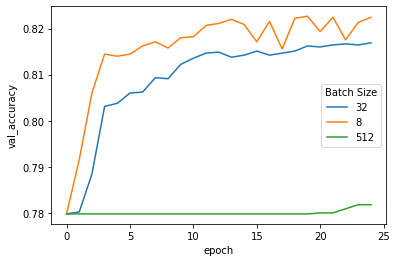

In [18]:
#=================================================-
#### Slide 10: Visualize results for various batch sizes (cont'd)  ####


sns.lineplot(x='epoch', y='val_accuracy', 
             hue='Batch Size', data=df_summary)




In [19]:
print(np.__version__)


1.26.4


<Axes: xlabel='epoch', ylabel='val_loss'>

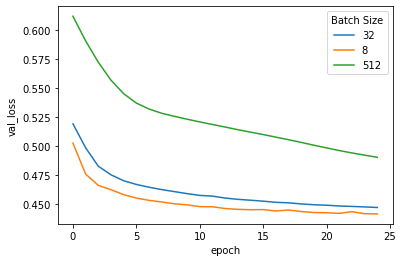

In [21]:
#=================================================-
#### Slide 11: Visualize results for various batch sizes (cont'd)  ####

sns.lineplot(x='epoch', y='val_loss', 
             hue='Batch Size', data=df_summary)




In [22]:
#=================================================-
#### Slide 14: Higher number of epochs  ####

ep_high = create_model().fit(X_train_scaled, y_train,
                             epochs = 150,
                             validation_data=(X_val_scaled, y_val))
                                                




Epoch 1/150
657/657 [==============================] - 1s 1ms/step - loss: 0.5796 - accuracy: 0.7703 - val_loss: 0.5353 - val_accuracy: 0.7798
Epoch 2/150
657/657 [==============================] - 1s 854us/step - loss: 0.5261 - accuracy: 0.7792 - val_loss: 0.5157 - val_accuracy: 0.7798
Epoch 3/150
657/657 [==============================] - 1s 810us/step - loss: 0.5106 - accuracy: 0.7792 - val_loss: 0.5020 - val_accuracy: 0.7798
Epoch 4/150
657/657 [==============================] - 1s 819us/step - loss: 0.4983 - accuracy: 0.7800 - val_loss: 0.4909 - val_accuracy: 0.7853
Epoch 5/150
657/657 [==============================] - 1s 875us/step - loss: 0.4881 - accuracy: 0.7825 - val_loss: 0.4813 - val_accuracy: 0.7884
Epoch 6/150
657/657 [==============================] - 1s 803us/step - loss: 0.4806 - accuracy: 0.7870 - val_loss: 0.4754 - val_accuracy: 0.7960
Epoch 7/150
657/657 [==============================] - 1s 802us/step - loss: 0.4758 - accuracy: 0.7933 - val_loss: 0.4717 - val_accu

657/657 [==============================] - 0s 733us/step - loss: 0.4399 - accuracy: 0.8195 - val_loss: 0.4391 - val_accuracy: 0.8202
Epoch 58/150
657/657 [==============================] - 0s 747us/step - loss: 0.4398 - accuracy: 0.8191 - val_loss: 0.4389 - val_accuracy: 0.8204
Epoch 59/150
657/657 [==============================] - 0s 731us/step - loss: 0.4397 - accuracy: 0.8193 - val_loss: 0.4388 - val_accuracy: 0.8227
Epoch 60/150
657/657 [==============================] - 0s 751us/step - loss: 0.4394 - accuracy: 0.8192 - val_loss: 0.4391 - val_accuracy: 0.8211
Epoch 61/150
657/657 [==============================] - 0s 756us/step - loss: 0.4391 - accuracy: 0.8184 - val_loss: 0.4390 - val_accuracy: 0.8222
Epoch 62/150
657/657 [==============================] - 0s 737us/step - loss: 0.4392 - accuracy: 0.8196 - val_loss: 0.4391 - val_accuracy: 0.8213
Epoch 63/150
657/657 [==============================] - 0s 746us/step - loss: 0.4387 - accuracy: 0.8198 - val_loss: 0.4388 - val_accuracy

657/657 [==============================] - 1s 816us/step - loss: 0.4323 - accuracy: 0.8210 - val_loss: 0.4349 - val_accuracy: 0.8222
Epoch 114/150
657/657 [==============================] - 1s 778us/step - loss: 0.4319 - accuracy: 0.8219 - val_loss: 0.4349 - val_accuracy: 0.8222
Epoch 115/150
657/657 [==============================] - 1s 790us/step - loss: 0.4321 - accuracy: 0.8215 - val_loss: 0.4347 - val_accuracy: 0.8224
Epoch 116/150
657/657 [==============================] - 0s 713us/step - loss: 0.4320 - accuracy: 0.8217 - val_loss: 0.4352 - val_accuracy: 0.8222
Epoch 117/150
657/657 [==============================] - 0s 735us/step - loss: 0.4319 - accuracy: 0.8215 - val_loss: 0.4350 - val_accuracy: 0.8236
Epoch 118/150
657/657 [==============================] - 0s 741us/step - loss: 0.4317 - accuracy: 0.8215 - val_loss: 0.4358 - val_accuracy: 0.8193
Epoch 119/150
657/657 [==============================] - 0s 733us/step - loss: 0.4316 - accuracy: 0.8215 - val_loss: 0.4344 - val_ac

In [23]:
#=================================================-
#### Slide 15: Medium number of epochs  ####

ep_medium = create_model().fit(X_train_scaled, y_train,
                               epochs = 100,
                               validation_data=(X_val_scaled, y_val))
                                                




Epoch 1/100
657/657 [==============================] - 1s 842us/step - loss: 0.5519 - accuracy: 0.7782 - val_loss: 0.5225 - val_accuracy: 0.7798
Epoch 2/100
657/657 [==============================] - 1s 787us/step - loss: 0.5163 - accuracy: 0.7792 - val_loss: 0.5059 - val_accuracy: 0.7798
Epoch 3/100
657/657 [==============================] - 1s 774us/step - loss: 0.4979 - accuracy: 0.7805 - val_loss: 0.4857 - val_accuracy: 0.7867
Epoch 4/100
657/657 [==============================] - 1s 768us/step - loss: 0.4819 - accuracy: 0.7893 - val_loss: 0.4750 - val_accuracy: 0.8009
Epoch 5/100
657/657 [==============================] - 0s 754us/step - loss: 0.4749 - accuracy: 0.7994 - val_loss: 0.4695 - val_accuracy: 0.8024
Epoch 6/100
657/657 [==============================] - 0s 747us/step - loss: 0.4712 - accuracy: 0.8018 - val_loss: 0.4664 - val_accuracy: 0.8060
Epoch 7/100
657/657 [==============================] - 1s 763us/step - loss: 0.4687 - accuracy: 0.8025 - val_loss: 0.4644 - val_ac

657/657 [==============================] - 0s 723us/step - loss: 0.4417 - accuracy: 0.8201 - val_loss: 0.4410 - val_accuracy: 0.8240
Epoch 58/100
657/657 [==============================] - 0s 717us/step - loss: 0.4415 - accuracy: 0.8198 - val_loss: 0.4407 - val_accuracy: 0.8242
Epoch 59/100
657/657 [==============================] - 0s 724us/step - loss: 0.4414 - accuracy: 0.8208 - val_loss: 0.4406 - val_accuracy: 0.8207
Epoch 60/100
657/657 [==============================] - 0s 696us/step - loss: 0.4410 - accuracy: 0.8207 - val_loss: 0.4407 - val_accuracy: 0.8196
Epoch 61/100
657/657 [==============================] - 0s 710us/step - loss: 0.4408 - accuracy: 0.8206 - val_loss: 0.4405 - val_accuracy: 0.8256
Epoch 62/100
657/657 [==============================] - 0s 721us/step - loss: 0.4407 - accuracy: 0.8210 - val_loss: 0.4405 - val_accuracy: 0.8247
Epoch 63/100
657/657 [==============================] - 0s 714us/step - loss: 0.4402 - accuracy: 0.8205 - val_loss: 0.4399 - val_accuracy

In [24]:
#=================================================-
#### Slide 16: Lower number of epochs  ####

ep_low = create_model().fit(X_train_scaled, y_train,
                            epochs = 25,
                            validation_data = (X_val_scaled, y_val))
                                                




Epoch 1/25
657/657 [==============================] - 1s 1ms/step - loss: 0.5449 - accuracy: 0.7792 - val_loss: 0.5195 - val_accuracy: 0.7798
Epoch 2/25
657/657 [==============================] - 1s 963us/step - loss: 0.5131 - accuracy: 0.7792 - val_loss: 0.5045 - val_accuracy: 0.7798
Epoch 3/25
657/657 [==============================] - 1s 975us/step - loss: 0.4991 - accuracy: 0.7792 - val_loss: 0.4914 - val_accuracy: 0.7798
Epoch 4/25
657/657 [==============================] - 1s 942us/step - loss: 0.4881 - accuracy: 0.7811 - val_loss: 0.4827 - val_accuracy: 0.7896
Epoch 5/25
657/657 [==============================] - 1s 898us/step - loss: 0.4812 - accuracy: 0.7878 - val_loss: 0.4763 - val_accuracy: 0.7922
Epoch 6/25
657/657 [==============================] - 1s 805us/step - loss: 0.4764 - accuracy: 0.7931 - val_loss: 0.4720 - val_accuracy: 0.8004
Epoch 7/25
657/657 [==============================] - 1s 799us/step - loss: 0.4727 - accuracy: 0.7990 - val_loss: 0.4689 - val_accuracy: 0

In [25]:
#=================================================-
#### Slide 17: Visualize results for epoch sizes  ####

epoch_sizes = []

for exp, result in zip([ep_high, ep_medium, ep_low], ["150", "100", "25"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Number of epochs'] = result

  epoch_sizes.append(df)

df_epochs = pd.concat(epoch_sizes)
df_epochs['Number of epochs'] = df_epochs['Number of epochs'].astype('str')




<Axes: xlabel='epoch', ylabel='val_accuracy'>

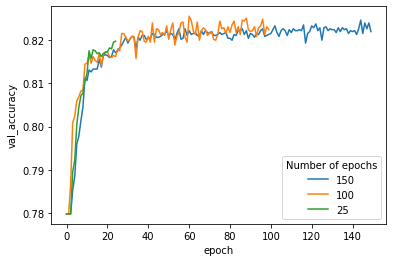

In [26]:
#=================================================-
#### Slide 18: Visualize results for epoch sizes (cont'd)  ####

sns.lineplot(x='epoch', y='val_accuracy', hue='Number of epochs', data=df_epochs)




<Axes: xlabel='epoch', ylabel='val_loss'>

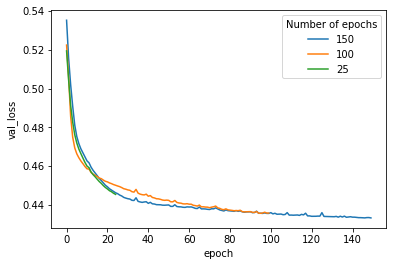

In [27]:
#=================================================-
#### Slide 19: Visualize results for epoch sizes (cont'd)  ####

sns.lineplot(x='epoch', y='val_loss', hue='Number of epochs', data=df_epochs)




In [ ]:
#=================================================-
#### Slide 21: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## NEURALNETWORKSANDDEEPLEARNING/1 MODELPERFORMANCEANDFIT/NEURALNETWORKSANDDEEPLEARNING MODELPERFORMANCEANDFIT 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [28]:
#=================================================-
#### Slide 17: Generate some fake data  ####

TRUE_W = 3.5         #<- true weight
TRUE_b = 50.0        #<- true bias
NUM_EXAMPLES = 1000  #<- number of observations

# Simulate inputs and noise from normal distribution.
inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Compute the outputs based on our equation.
outputs = inputs * TRUE_W + TRUE_b + noise




In [29]:
inputs

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([-1.10122025e+00,  1.54575169e+00,  3.83644015e-01, -8.79657865e-01,
       -1.22467220e+00, -9.81121123e-01,  8.78078267e-02, -2.03260377e-01,
       -5.58156192e-01, -7.20544040e-01, -6.25992417e-01, -7.15025961e-01,
       -3.48354459e-01, -3.36469829e-01,  1.82575777e-01,  1.10859525e+00,
        1.27965868e+00, -2.14758366e-02, -3.19688827e-01,  3.73325527e-01,
        2.52791077e-01,  6.43766403e-01,  2.14630795e+00, -8.25149834e-01,
       -9.04136777e-01,  1.39487863e+00,  1.22487509e+00,  5.86495958e-02,
       -4.92131382e-01, -8.19978058e-01, -1.85260117e-01, -3.92776847e-01,
       -6.58522606e-01, -9.83338773e-01,  3.88837755e-01, -1.03724480e+00,
       -1.56005692e+00, -1.57912552e-01, -3.56694311e-01, -2.00440288e-01,
        1.61310697e+00,  6.79672778e-01,  8.13323334e-02,  1.33807635e+00,
        1.18480527e+00, -3.53815615e-01, -1.04001746e-01, -7.51146436e-01,
       -3.72746259e-01, -8.73273134e-01,  1.6906021

In [30]:
noise

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 4.03087884e-01, -1.08802080e+00, -6.30953535e-02,  1.33655667e+00,
        7.11760104e-01, -4.89286453e-01, -7.64221311e-01, -1.03724861e+00,
       -1.25193381e+00,  2.12242808e-02, -5.51375806e-01, -1.74316978e+00,
       -3.35360944e-01, -1.04266751e+00,  1.00913823e+00,  1.23625386e+00,
       -6.83689058e-01,  6.73608959e-01, -4.20622766e-01, -1.04130280e+00,
       -6.79744661e-01,  1.40951955e+00, -4.77361292e-01,  2.04731011e+00,
        8.51356328e-01, -1.70716658e-01,  3.91594768e-01,  5.53402662e-01,
       -1.90498739e-01,  1.09984726e-01, -4.72127467e-01, -2.76766777e-01,
       -6.77475393e-01,  1.80407047e+00, -7.74506480e-02,  6.54915631e-01,
        4.85211723e-02,  1.76784813e-01, -4.89219904e-01, -1.21105766e+00,
        1.30744934e+00,  4.55165416e-01,  8.71571004e-01, -8.03100288e-01,
       -1.37029457e+00, -1.05789959e+00, -1.64911711e+00,  6.08468533e-01,
        1.98100686e+00, -1.38812208e+00, -1.1001082

In [31]:
outputs

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([46.548817, 54.32211 , 51.27966 , 48.25775 , 46.425407, 46.076786,
       49.543106, 48.251343, 46.794518, 47.49932 , 47.25765 , 45.754242,
       48.445396, 47.77969 , 51.648155, 55.11634 , 53.795116, 50.598446,
       48.460464, 50.26534 , 50.205025, 53.6627  , 57.034718, 49.159286,
       47.68688 , 54.71136 , 54.678658, 50.758675, 48.087044, 47.240063,
       48.879463, 48.348515, 47.017696, 48.362385, 51.28348 , 47.02456 ,
       44.588326, 49.624092, 48.262352, 48.087402, 56.953323, 52.83402 ,
       51.156235, 53.880165, 52.776527, 47.703747, 47.986877, 47.979454,
       50.676395, 45.55542 , 49.4916  , 53.82505 , 52.834694, 47.665703,
       47.839935, 45.270496, 46.511814, 58.5393  , 48.386578, 54.584343,
       48.227787, 52.376743, 50.719143, 53.16124 , 49.165028, 48.463036,
       56.638664, 48.276634, 51.7231  , 49.73924 , 53.19786 , 42.63064 ,
       47.929005, 51.28611 , 46.9605  , 49.854973, 44.716133, 47.675022,
  

In [32]:
#=================================================-
#### Slide 18: Neural network architecture  ####

# Define model.
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)   #<- initial weight
    self.b = tf.Variable(40.0)  #<- initial bias

  def __call__(self, x):
    return self.W * x + self.b #<- compute the equation
    
# Initialize the model.
model = Model()

# Check if it outputs correct results.
assert model(3.0).numpy() == 64.0





In [ ]:
#=================================================-
#### Slide 19: Loss function  ####

# Define loss function.
def loss(target_y, predicted_y):
  "MSE"
  return tf.reduce_mean(tf.square(target_y - predicted_y))





In [ ]:
#=================================================-
#### Slide 20: Initial weights  ####

print('Current loss: %1.6f' % loss(model(inputs), 
       outputs).numpy())
plt.scatter(inputs, outputs, c = 'b')
plt.scatter(inputs, model(inputs), c = 'r')
plt.show()




In [ ]:
#=================================================-
#### Slide 21: Update weights based on gradient  ####

# Define the train function for our NN.
def train(model, inputs, outputs, learning_rate):

  with tf.GradientTape() as t: 
     current_loss = loss(outputs, model(inputs)) #<- compute loss
  
  # Compute partial derivatives:
  # how much does a particular obvs + W + b contribute to that loss.
  dW, db = t.gradient(current_loss, [model.W, model.b]) 
  
  # Update with new weights and bias using our learning rate.
  model.W.assign_sub(learning_rate * dW) 
  model.b.assign_sub(learning_rate * db)





In [ ]:
#=================================================-
#### Slide 22: Train the neural network  ####

model = Model()

# Store some history of weights.
Ws, bs = [], []
epochs = range(15)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))




In [ ]:
#=================================================-
#### Slide 23: Inspect the results  ####

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()




In [ ]:
#=================================================-
#### Slide 24: Inspect the results (cont'd)  ####

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()




In [ ]:
#=================================================-
#### Slide 25: Inspect the results (cont'd)  ####

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())



#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
